In [1]:
state = 'MT' 
year = 2020
obj_type = 'perimeter'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from MT_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 150 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 536692 and U = 547533 and k = 2.

****************************************
Trying deviation = 5421.125
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 1, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 48, 49, 50, 53, 55], [2, 3, 4, 10, 13, 19, 22, 23, 24, 26, 28, 29, 31, 35, 39, 40, 46, 47, 51, 52, 54]]
Objective value: 48.718800810860444
Deviation: 2911.5

****************************************
Running labeling model!
****************************************
L = 536692 and U = 547533
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to

     0     0   38.98107    0   97   49.20315   38.98107  20.8%     -    0s
     0     0   38.98332    0   98   49.20315   38.98332  20.8%     -    0s
     0     0   39.05468    0   97   49.20315   39.05468  20.6%     -    0s
     0     0   39.09133    0  101   49.20315   39.09133  20.6%     -    0s
     0     0   39.09715    0  101   49.20315   39.09715  20.5%     -    0s
     0     0   39.09993    0  101   49.20315   39.09993  20.5%     -    0s
     0     0   39.13367    0  103   49.20315   39.13367  20.5%     -    0s
     0     0   39.25799    0  108   49.20315   39.25799  20.2%     -    0s
     0     0   39.28305    0  115   49.20315   39.28305  20.2%     -    0s
     0     0   39.38367    0  110   49.20315   39.38367  20.0%     -    0s
     0     0   39.38384    0  111   49.20315   39.38384  20.0%     -    0s
     0     0   39.42167    0  109   49.20315   39.42167  19.9%     -    0s
     0     0   39.42201    0  112   49.20315   39.42201  19.9%     -    0s
     0     0   39.44385  

     0     0   39.64559    0  106   49.99006   39.64559  20.7%     -    0s
     0     0   39.64559    0  107   49.99006   39.64559  20.7%     -    0s
     0     0   39.71233    0  106   49.99006   39.71233  20.6%     -    0s
     0     0   39.73006    0  101   49.99006   39.73006  20.5%     -    0s
     0     0   39.73989    0  102   49.99006   39.73989  20.5%     -    0s
     0     0   39.83347    0  113   49.99006   39.83347  20.3%     -    0s
     0     0   39.83538    0  118   49.99006   39.83538  20.3%     -    0s
     0     0   39.84179    0  120   49.99006   39.84179  20.3%     -    0s
     0     0   39.84317    0  122   49.99006   39.84317  20.3%     -    0s
     0     0   39.84435    0  123   49.99006   39.84435  20.3%     -    0s
     0     0   39.85049    0   97   49.99006   39.85049  20.3%     -    0s
     0     0   39.86458    0  112   49.99006   39.86458  20.3%     -    0s
     0     0   39.88679    0  107   49.99006   39.88679  20.2%     -    0s
     0     0   39.88679  

Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [2e-03, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]

User MIP start produced solution with objective 60.7282 (0.01s)
Loaded user MIP start with objective 60.7282

Presolve removed 925 rows and 662 columns
Presolve time: 0.01s
Presolved: 799 rows, 726 columns, 2498 nonzeros
Variable types: 0 continuous, 726 integer (726 binary)

Root relaxation: objective 3.708471e+01, 207 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   37.08471    0   63   60.72818   37.08471  38.9%     -    0s
     0     0   37.28321    0   69   60.72818   37.28321  38.6%     -    0s
     0     0   37.83794    0   76   60.72818   37.83794  37.7%     -    0s
     0     0   37.88572    0   76   60.72818   37.88572  37.6%     -    0s
     0     0   37.9953

     0     0   37.90577    0   80   61.54510   37.90577  38.4%     -    0s
     0     0   37.90779    0   83   61.54510   37.90779  38.4%     -    0s
     0     0   37.91060    0   83   61.54510   37.91060  38.4%     -    0s
     0     0   37.93532    0   84   61.54510   37.93532  38.4%     -    0s
     0     0   37.97753    0   86   61.54510   37.97753  38.3%     -    0s
     0     0   37.97854    0   88   61.54510   37.97854  38.3%     -    0s
     0     0   38.05651    0   86   61.54510   38.05651  38.2%     -    0s
     0     0   38.05763    0   85   61.54510   38.05763  38.2%     -    0s
     0     0   38.05914    0   88   61.54510   38.05914  38.2%     -    0s
     0     0   38.11443    0   86   61.54510   38.11443  38.1%     -    0s
     0     0   38.11504    0   87   61.54510   38.11504  38.1%     -    0s
     0     0   38.11504    0   88   61.54510   38.11504  38.1%     -    0s
     0     0   38.16517    0   87   61.54510   38.16517  38.0%     -    0s
     0     0   38.16716  

     0     0   38.16895    0   73   61.76321   38.16895  38.2%     -    0s
     0     0   38.16899    0   77   61.76321   38.16899  38.2%     -    0s
     0     0   38.21483    0   85   61.76321   38.21483  38.1%     -    0s
     0     0   38.35137    0   89   61.76321   38.35137  37.9%     -    0s
     0     0   38.46015    0   92   61.76321   38.46015  37.7%     -    0s
     0     0   38.58919    0   93   61.76321   38.58919  37.5%     -    0s
     0     0   38.58919    0   93   61.76321   38.58919  37.5%     -    0s
     0     0   38.68226    0   95   61.76321   38.68226  37.4%     -    0s
     0     0   38.94374    0   91   61.76321   38.94374  36.9%     -    0s
     0     0   38.94534    0   97   61.76321   38.94534  36.9%     -    0s
     0     0   39.00789    0   82   61.76321   39.00789  36.8%     -    0s
     0     0   39.08814    0   96   61.76321   39.08814  36.7%     -    0s
     0     0   39.08814    0   97   61.76321   39.08814  36.7%     -    0s
     0     0   39.08955  

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
no_solution_region = [0, min(round(r[2],1) for r in result)]
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 0.5]



####################################################################################################
Pareto Frontier for state MT,  objective perimeter
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55], [2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 21, 24, 25, 2

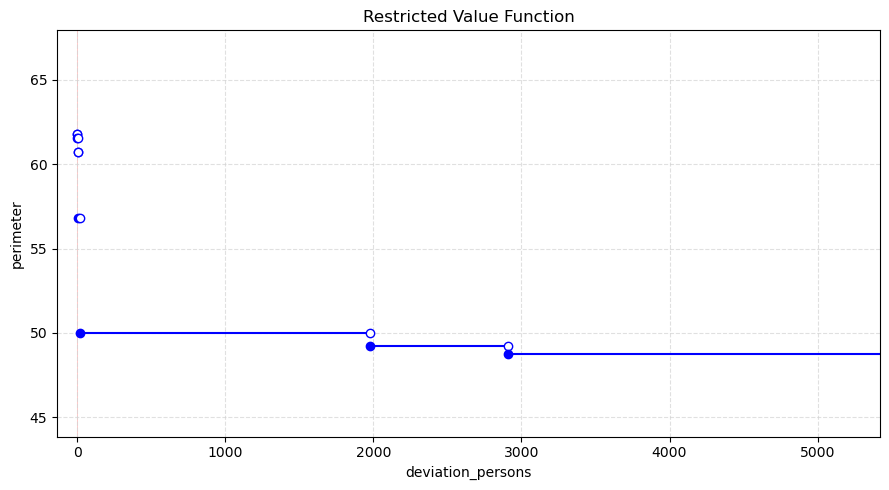

In [9]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state MT, objective perimeter
####################################################################################################



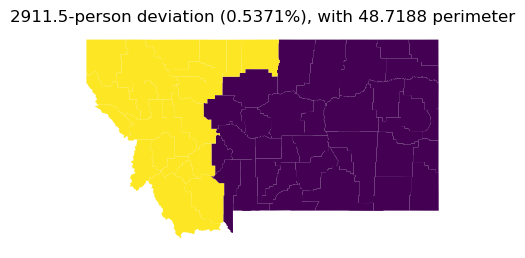

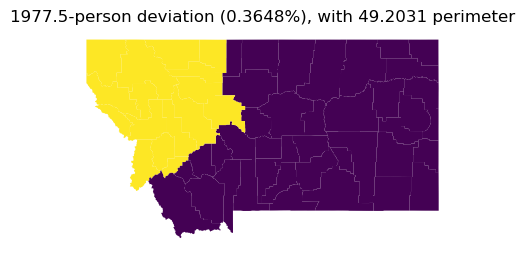

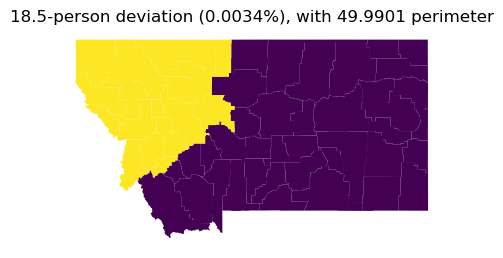

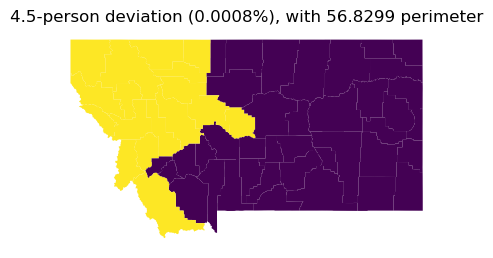

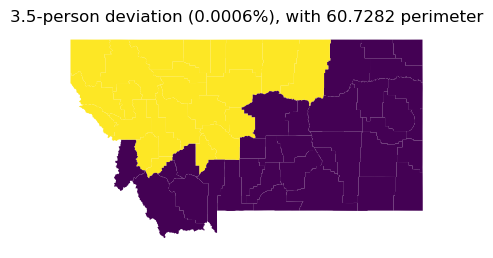

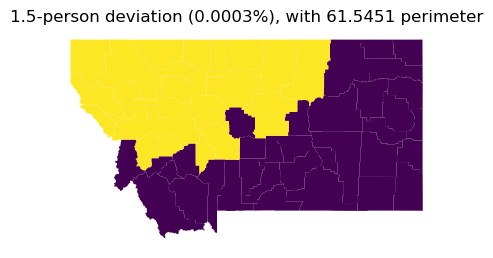

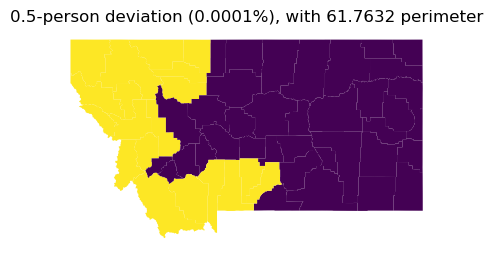

In [10]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)